In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Visualize classifier decision boundaries.

In [2]:
def plot_decision_boundary(clf, xlim, ylim, grid_resolution):
    """Display how clf classifies each point in the space specified by xlim and ylim.
    
    - clf is a classifier.
    - xlim and ylim are each 2-tuples of the form (low, high).
    - grid_resolution specifies the number of points into which the xlim is divided
      and the number into which the ylim interval is divided. The function plots
      grid_resolution * grid_resolution points."""

    # ... your code here ...
    x_grid_points = np.tile(np.linspace(xlim[0], xlim[1], grid_resolution), grid_resolution)
    y_grid_points = np.repeat(np.linspace(ylim[0], ylim[1], grid_resolution), grid_resolution)
    coordinates = np.stack((x_grid_points, y_grid_points),axis=1) # size:(10000, 2)
    colors = {-1:'pink', 1:'lightskyblue'}
    predicted_labels = clf.predict(coordinates)
    # convert predicted labels into color (string)
    padding = []
    for label in predicted_labels:
      padding.append(colors[label])
    plt.scatter(x_grid_points, y_grid_points, c=np.asarray(padding))

## Visualize the decision boundary for an SVM.

D:\python3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


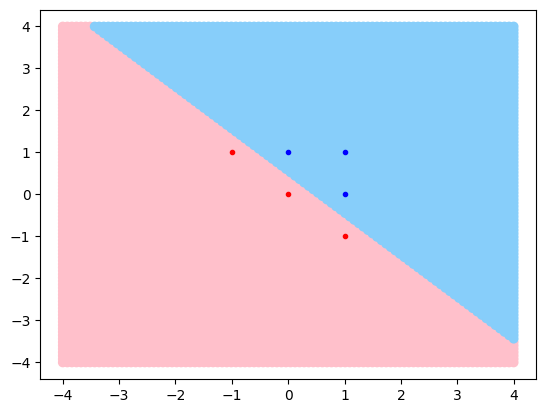

In [3]:
data_string = """
x0, x1,  y
 0,  0, -1
-1,  1, -1
 1, -1, -1
 0,  1,  1
 1,  1,  1
 1,  0,  1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(df[['x0', 'x1']], df['y'])
# 2x0 + 2x1 - 1 = 0 (decision boundary) --> x1 = -x0 + 1/2

# Call student's function.
plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1): #1st round -1, 2nd round 1
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

## Visualize the decision boundary for a decision tree.

|--- x1 <= -0.50
|   |--- class: -1
|--- x1 >  -0.50
|   |--- x0 <= 0.50
|   |   |--- x0 <= -0.50
|   |   |   |--- class: -1
|   |   |--- x0 >  -0.50
|   |   |   |--- x1 <= 0.50
|   |   |   |   |--- class: -1
|   |   |   |--- x1 >  0.50
|   |   |   |   |--- class: 1
|   |--- x0 >  0.50
|   |   |--- class: 1



D:\python3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


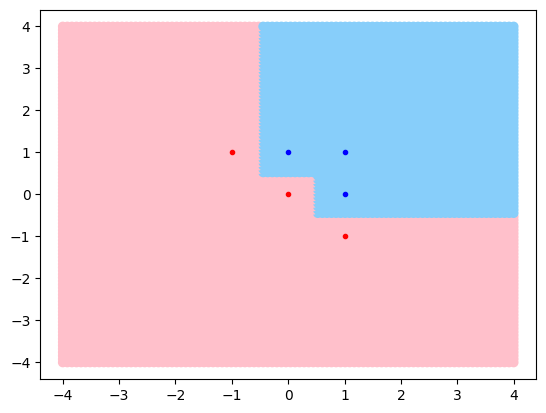

In [4]:
# ... your code here ...
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(df[['x0', 'x1']], df['y'])
print(export_text(clf, feature_names=['x0', 'x1']))

plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1): #1st round -1, 2nd round 1
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

## Visualize the decision boundary for kNN with $k=3$.


D:\python3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


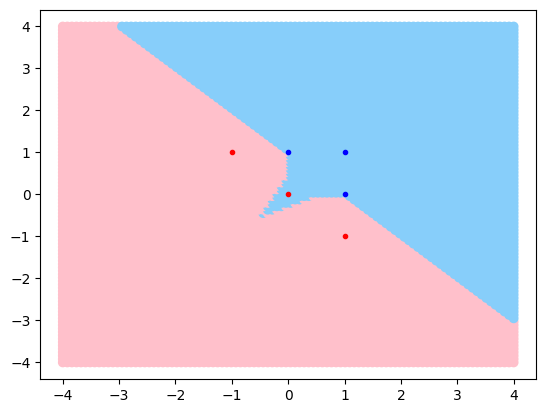

In [5]:
# ... your code here ...
k = 3
clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
clf.fit(df[['x0', 'x1']], df['y'])

plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1): #1st round -1, 2nd round 1
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

For k=1, the decision boundary graph looks the same as the decision tree's plot above. $\newline$
For k=2, the decision boundary perfectly splits all the point into two groups $\newline$
For k=3, the decision boundary contains one misclassfication error which includes one red point in blue region

## Visualize the decision boundary for an SVM with a nonlinear boundary.
Use the example under the header "Nonlinear boundary: use kernel trick" in https://pages.stat.wisc.edu/~jgillett/451/burkov/03/03SVM.html.
- Read the data from http://www.stat.wisc.edu/~jgillett/451/data/circles.csv.
  This ".csv" file has y in {0, 1}, so change the 0 values to -1.
- Fit an SVM with kernel='rbf', C=1, gamma=1/2.

C:\Users\Ren\AppData\Local\Temp\ipykernel_11692\3717839109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.y[df.y == 0] = -1
D:\python3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


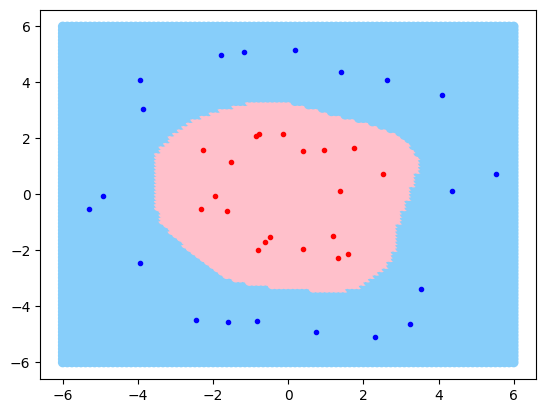

In [11]:
# ... your code here ...
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/circles.csv', engine='python')
# convert 0s into -1s
df.y[df.y == 0] = -1

gamma = 0.5
clf = svm.SVC(kernel='rbf', C=1, gamma=gamma)
clf.fit(df[['x0', 'x1']], df['y'])

plot_decision_boundary(clf=clf, xlim=(-6, 6), ylim=(-6, 6), grid_resolution=100)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1): #1st round -1, 2nd round 1
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

The larger the gamma is, the larger the blue region (label=1) is. And the pink area will be cut into plenty of individual areas when the gamma is large.

## Run gradient descent by hand.
Run gradient descent with $\alpha = 0.1$ to minimize $z = f(x, y)
= (x + 1)^2 + (y + 2)^2$. Start at (0, 0) and find the next two points
on the descent path.

The minimum is at (-1, -2), so your answer should be approaching this point.

$\begin{align*}
\frac{\partial f}{\partial x} = & 2x + 2 \\
\frac{\partial f}{\partial y} = & 2y + 4 \\
initial point: i=0, x_1 = (x_i, y_i) = (0, 0), \nabla f = (2, 4), & -\alpha \nabla f = (-0.2, -0.4) \\
point1: i=1, x_2 = (x_i, y_i) = (-0.2, -0.4), \nabla f = (1.6, 3.2), & -\alpha \nabla f = (-0.16, -0.32) \\
point2: i=2, x_3 = (x_i, y_i) = (-0.36, -0.72), \nabla f = (1.28, 2.56), & -\alpha \nabla f = (-0.128, -0.256) \\
\end{align*}$

      x0     x1  y
0 -1.937 -0.006  0
1 -1.622 -0.057  0
2 -0.791 -0.200  0
3 -0.614 -0.171  0
4 -0.490 -0.154  0


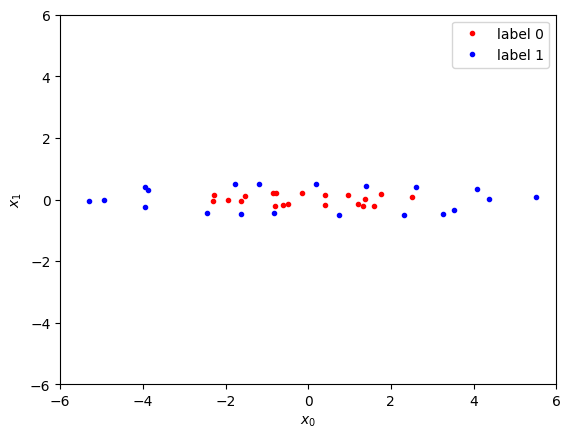

In [7]:
# ... your code here ...
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv', engine='python')
# Display first five rows
print(df.head())
colors = {0:'red', 1:'blue'}
labels = {0:'label 0', 1:'label 1'}
# Plotting
for y in (0, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y], label=labels[y])
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.legend()
plt.show(block=True)

### Train a $k$NN classifier and report its accuracy.
- Use $k = 3$ and the (default) euclidean metric.
- Report the accuracy on the training data

In [8]:
# ... your code here ...
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf.fit(df[['x0', 'x1']], df['y'])
accuracy = clf.score(df[['x0', 'x1']], df['y'])
print(f'The training accuracy is {accuracy:.3}')

The training accuracy is 0.725


### Now rescale the features using standardization; plot, train, and report accuracy again.

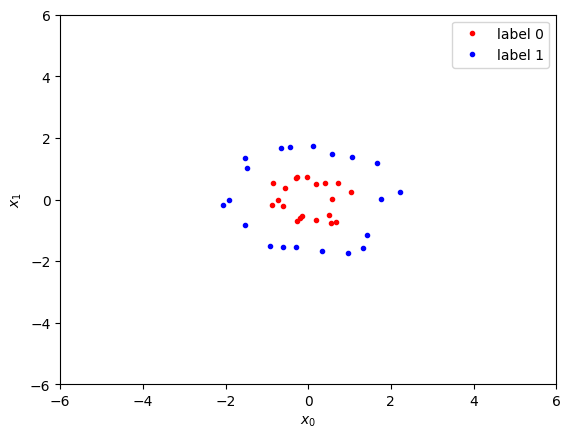

The training accuracy is 1.0


In [9]:
# Scaling, use Dataframe will be easier to assign labels to each coordinates
scaler = StandardScaler()
X = scaler.fit_transform(df[['x0', 'x1']]) # return ndarray
y = df[['y']].to_numpy().ravel()
df.x0 = X[:,0]
df.x1 = X[:,1]

# Plotting
colors = {0:'red', 1:'blue'}
labels = {0:'label 0', 1:'label 1'}

# Plotting
for i in (0, 1):
    plt.plot(df.x0[df.y == i], df.x1[df.y == i], '.', color=colors[i], label=labels[i])
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.legend()
plt.show(block=True)

# Train KNN, report accuracy
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf.fit(X, y)
accuracy = clf.score(X, y)
print(f'The training accuracy is {accuracy:.3}')

### Train a decision tree classifier on the original (unscaled) data and report its accuracy.
- Train on the training data.
- Report the accuracy as before.

In [10]:
# ... your code here ...
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/ellipses.csv', engine='python')
X = df[['x0', 'x1']].to_numpy()
y = df[['y']].to_numpy().ravel()

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)
accuracy = clf.score(X, y)
print(f'The training accuracy is {accuracy:.3}')

The training accuracy is 1.0
